## TP2  : Regression linéaire

In [1]:
%matplotlib notebook
import pandas as pd                    
import numpy as np                  
import matplotlib.pyplot as plt     
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
import seaborn
import warnings
import random
warnings.filterwarnings('ignore')

**1. Import de la base de données**

In [2]:
df = pd.read_csv('./data_contamine.csv', names = ['X' + str(i)  for i in range (0,160)] + ['Y'])
dfX = df.drop(columns = ['Y'], axis='columns').copy()
dfY = df.loc[:,["Y"]].copy()

df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X151,X152,X153,X154,X155,X156,X157,X158,X159,Y
0,0.223773,2.407005,-0.536073,-1.336626,-0.097947,1.549540,1.590890,1.190101,-1.181936,2.731036,...,-1.157572,-0.316955,-1.041194,-0.929746,-1.779339,-1.429081,2.685259,0.953334,-0.564672,151.0
1,-0.515789,-0.799958,1.582195,-0.008126,0.414271,1.363709,-0.098582,-0.302917,-0.544602,-0.241896,...,0.241794,-0.937335,0.288955,-0.177624,0.084456,0.633965,1.052004,-0.113860,0.505908,75.0
2,0.023454,0.048646,0.224159,0.655717,-0.176065,1.605403,1.638630,-1.240650,2.100396,-1.031570,...,0.483655,0.869513,0.881769,-0.958674,1.880679,0.608850,-0.057137,-0.950829,-0.594289,141.0
3,0.892292,-0.494714,-1.062153,0.736429,-0.118200,-1.078412,-0.454316,-0.378080,2.679422,-0.051751,...,0.385350,-0.021720,0.863478,0.256292,0.293780,0.216499,-0.637889,-1.179666,-1.112571,206.0
4,-1.021634,-1.805761,0.082164,0.387965,-0.838219,1.596253,0.037945,-1.012175,1.632963,-0.533814,...,0.661239,0.329027,-0.757433,0.082726,0.267892,0.282614,-2.022049,-2.201643,0.786962,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.099858,-1.783441,-1.563688,0.115844,0.950344,-2.001312,-0.983234,-1.303273,-1.245733,-0.836314,...,0.149098,0.233905,-2.350869,-0.119769,-2.173684,-0.569853,-1.395913,0.064790,0.902037,178.0
438,-1.354643,0.049047,-1.601002,0.300223,-1.606891,0.438829,3.302048,1.134504,2.407917,1.273360,...,-0.549098,-0.225446,0.778094,1.037341,2.220547,0.435243,1.060447,0.967322,-3.642062,104.0
439,0.724236,2.924964,0.427710,-0.727469,0.740514,0.453221,0.581068,-0.044940,-0.206191,0.671804,...,-1.018713,1.631551,0.907589,-0.785107,1.140840,0.638379,0.952108,0.977634,-0.868044,132.0
440,-0.682602,-0.936907,-0.088368,-0.046932,-0.283095,0.359248,-1.415857,0.297645,-0.415684,-0.590617,...,0.719171,-0.632305,1.252630,0.343075,-0.158593,-3.155686,-0.154837,0.754478,1.358309,220.0


On constate qu'il y a 161 colonnes, soient 160 variables explicatives, plus la variable à expliquer. 
Il y a 442 lignes qui correspondent au nombre d'observations, c'est-à-dire au nombre de patients. 

**2. Vérification du centrage, de la normalisation, et tracé**

In [3]:
# Calcul des moyennes
M = df.mean()

# Moyenne de Y, qu'on écarte
M_Y = M[-1]
M = M.drop(labels = ["Y"])

# Test de centrage sur les variables
M_X = M[0]
M_centree = np.allclose(0.0, M_X, 0.01)
for m in M:
    M_centree = M_centree & np.allclose(M_X, m, 0.01)
    M_X = m
print("Les variables explicatives sont-elles centrées ? " + str(M_centree))
print("La moyenne de Y vaut : " + str(round(M_Y, 3)) + ", donc Y n'est pas centrée")

# Calcul de l'écart-tpye
std = df.std()
std_Y = std[-1]
std = std.drop(labels = ["Y"])

# Test de normalisation sur les variables
std_X = std[0]
std_norm = np.allclose(1.0, std_X, 0.01)
for s in std:
    std_norm = std_norm & np.allclose(std_X, s, 0.01)
    std_0 = s
print("Les variables explicatives sont-elles normalisées ? " + str(std_norm))
print("L'écart type de Y vaut : " + str(round(std_Y, 3)) + ", donc Y n'est pas normalisée")

Les variables explicatives sont-elles centrées ? True
La moyenne de Y vaut : 152.133, donc Y n'est pas centrée
Les variables explicatives sont-elles normalisées ? True
L'écart type de Y vaut : 77.093, donc Y n'est pas normalisée


On constate que les variables explicatives sont centrées et normalisées.
La variable à expliquer n'est ni centrée ni normalisée.

<IPython.core.display.Javascript object>


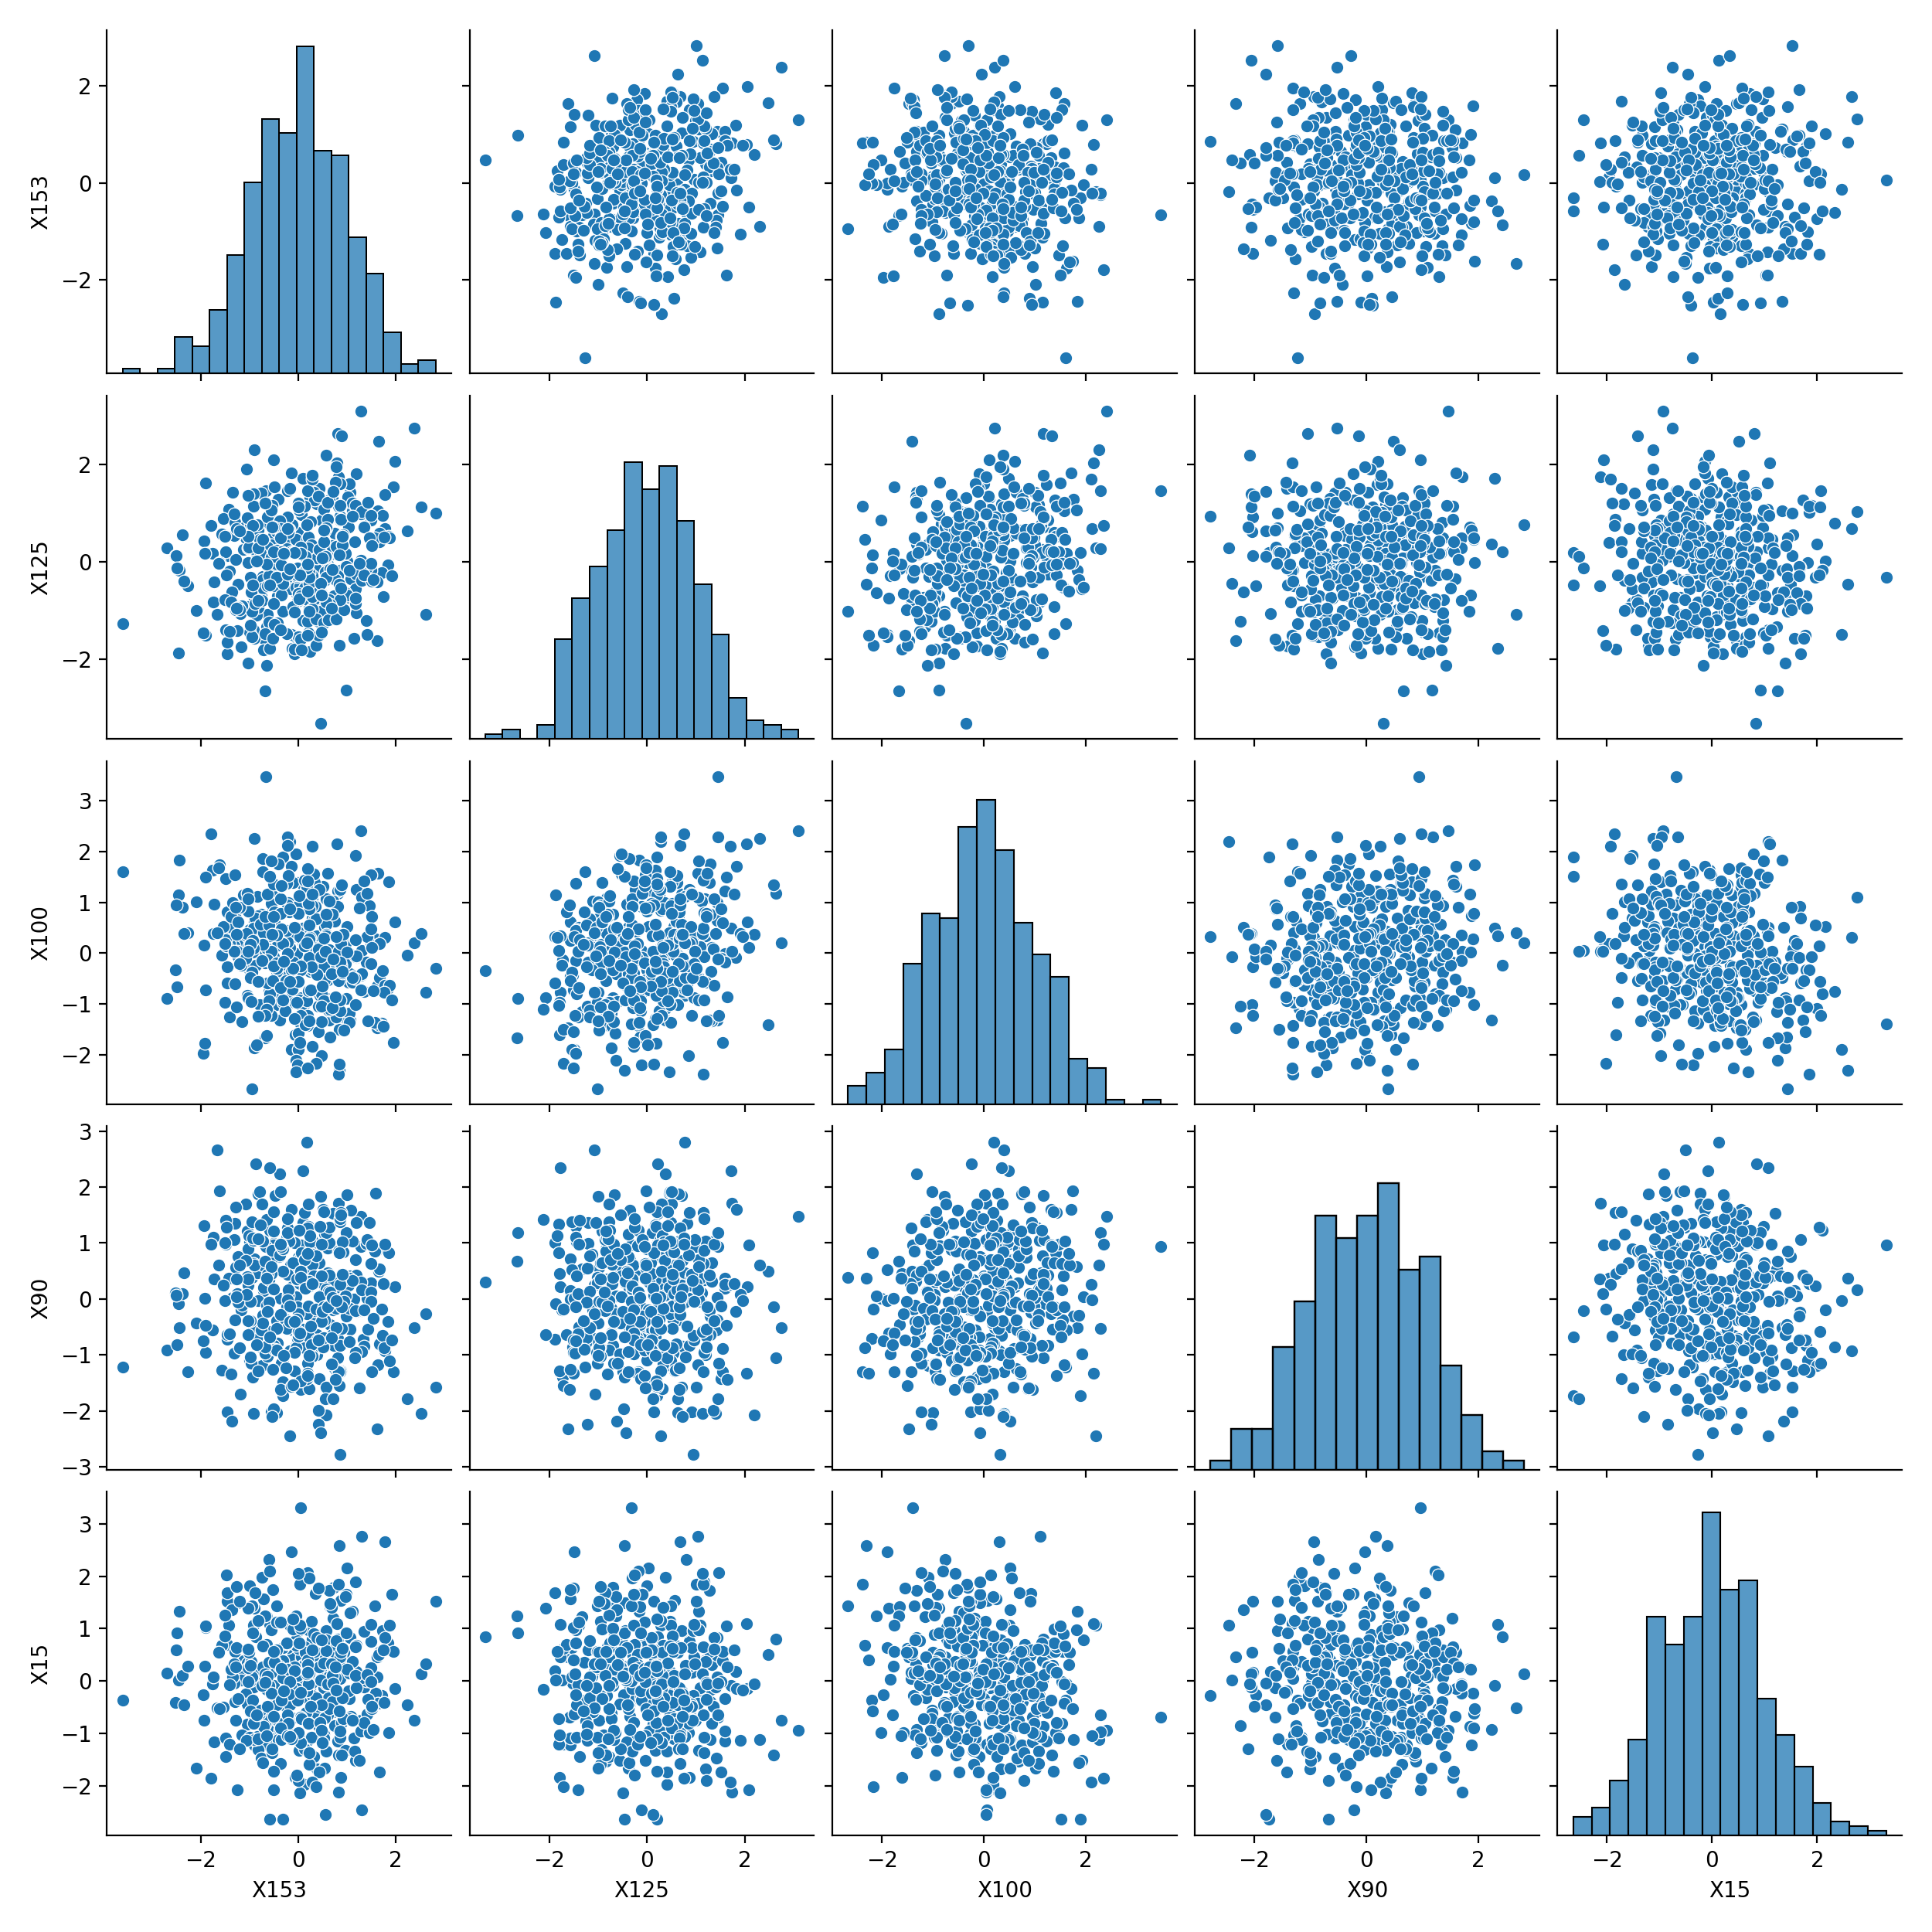

Les variables choisies sont ['X153', 'X125', 'X100', 'X90', 'X15']


In [49]:
# on choisit les variables
X1 = []
for i in range(5):
    X1.append("X" + str(random.randrange(1, 160)))

# on représente
seaborn.pairplot(df[X1])

print('Les variables choisies sont {}'.format(X1))


- Sur la distribution des variables : 
on constate que la forme des histogrammes est compatible d'une distribution gaussienne centrée et normalisée. On retrouve donc les réusltats de la question précédente. 
- Sur la corrélation entre les variables explicatives ert la variable à expliquer : 
on constate que les nuages de points de Y en fonction des Xi choisies au hasard présentent une répartition isotrope, ce qui suggère une absence de corrélation entre ces variables explicatives et la variable à expliquer.
(aucune vraie variable explicative n'est sortie lors du tirage à la rédaction de cette question, mais ça n'est pas impossible lors de l'exécution à la correction. Dans ce cas on pourrait observer un axe privilégié). 


**3. Création des sets d'entraînement et de test**

In [5]:
# définition de l'index de test
i_train = random.sample(range(0,dfX.shape[0]),round(0.75 *dfX.shape[0]))
i_train.sort()

# définition des set d'entraînement et de test
dfX_train = dfX.iloc[i_train]
dfY_train = dfY.iloc[i_train]
dfX_test = dfX.iloc[dfX.index.difference(i_train)]
dfY_test = dfY.iloc[dfX.index.difference(i_train)]

# Vérification des tailles
print(f" Les dimensions du set d'entrainement sont : {dfX_train.shape}")
print(f" Les dimensions du set de test sont : {dfX_test.shape}")

 Les dimensions du set d'entrainement sont : (332, 160)
 Les dimensions du set de test sont : (110, 160)


Le dataset d'entraînement contient 332 observations et le dataset de test en contient 110.

In [6]:
# Test de normalisation sur X_train
std_train = dfX_train.std()
std_X_train = std_train[0]
std_norm = np.allclose(1.0, std_X_train, 0.01)
for s in std_train:
    std_norm = std_norm & np.allclose(std_X, s, 0.01)
    std_0 = s
print("Les variables explicatives sont-elles normalisées ? " + str(std_norm))

Les variables explicatives sont-elles normalisées ? False


**4. Matrice de covariance et tracé du graphe des valeurs propres**

In [7]:
dfcovX_train = dfX_train.cov()
dfcovX_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159
X0,1.001527,0.324220,0.001453,0.259089,0.030998,-0.107116,0.080007,0.306806,-0.116702,-0.055880,...,-0.055820,0.146701,0.208392,0.132911,-0.027257,0.162548,0.266607,-0.078711,0.036842,-0.047082
X1,0.324220,1.045551,0.210446,-0.224950,-0.010333,0.212693,0.211585,-0.001133,-0.156929,0.030063,...,-0.085137,0.176575,0.171848,0.008765,0.019045,0.117428,0.183574,0.169033,0.140379,-0.177751
X2,0.001453,0.210446,1.048611,-0.138764,0.261318,0.359530,-0.309037,0.041045,-0.171720,-0.304802,...,0.047872,-0.265257,-0.056992,0.391091,0.064572,0.068142,0.193422,0.261497,-0.053264,0.337443
X3,0.259089,-0.224950,-0.138764,1.050873,0.097487,-0.253441,0.133198,0.538892,0.075756,-0.205651,...,-0.256686,-0.254060,0.231336,-0.283483,-0.028607,0.347748,0.080174,0.123431,-0.097607,0.042741
X4,0.030998,-0.010333,0.261318,0.097487,0.938550,-0.205844,-0.122369,-0.339696,-0.357277,-0.031456,...,-0.001058,-0.218857,0.308283,0.108574,0.046277,0.025379,-0.076448,0.063062,0.116892,0.232430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X155,0.162548,0.117428,0.068142,0.347748,0.025379,-0.066008,0.277839,0.142554,0.200843,-0.261270,...,-0.067164,0.078146,0.202804,0.411456,-0.028881,0.986710,-0.022930,0.069279,-0.026475,-0.192080
X156,0.266607,0.183574,0.193422,0.080174,-0.076448,-0.083705,-0.049986,0.020525,0.233614,-0.127369,...,0.060147,-0.317338,-0.045824,0.047885,-0.012413,-0.022930,0.964929,0.090236,-0.054953,-0.106328
X157,-0.078711,0.169033,0.261497,0.123431,0.063062,0.068630,0.184706,0.244776,-0.137592,0.126627,...,-0.569277,-0.338317,-0.119053,0.040743,0.002872,0.069279,0.090236,0.958000,0.011460,-0.064556
X158,0.036842,0.140379,-0.053264,-0.097607,0.116892,-0.050484,0.101896,0.279947,-0.552049,0.061584,...,0.118588,-0.108907,-0.118073,0.203876,-0.022862,-0.026475,-0.054953,0.011460,0.978949,0.076916


In [8]:
covX_train = np.array(dfcovX_train)
print(covX_train)

# Matrices des sets d'entraînement et de test
X_train = np.array(dfX_train)
Y_train = np.array(dfY_train)
X_test = np.array(dfX_test)
Y_test = np.array(dfY_test)

[[ 1.00152717  0.32421999  0.00145263 ... -0.07871139  0.03684246
  -0.04708179]
 [ 0.32421999  1.04555148  0.21044618 ...  0.16903317  0.14037855
  -0.17775107]
 [ 0.00145263  0.21044618  1.04861081 ...  0.26149715 -0.05326389
   0.33744306]
 ...
 [-0.07871139  0.16903317  0.26149715 ...  0.95800001  0.01145985
  -0.06455564]
 [ 0.03684246  0.14037855 -0.05326389 ...  0.01145985  0.97894897
   0.07691584]
 [-0.04708179 -0.17775107  0.33744306 ... -0.06455564  0.07691584
   1.03473448]]


In [9]:
# Valeurs propres de la matrice de covariance des variables explicatives sur le set d'entraînement
valp_train = np.real(np.linalg.eigvals(covX_train))
valp_train.sort()

<IPython.core.display.Javascript object>


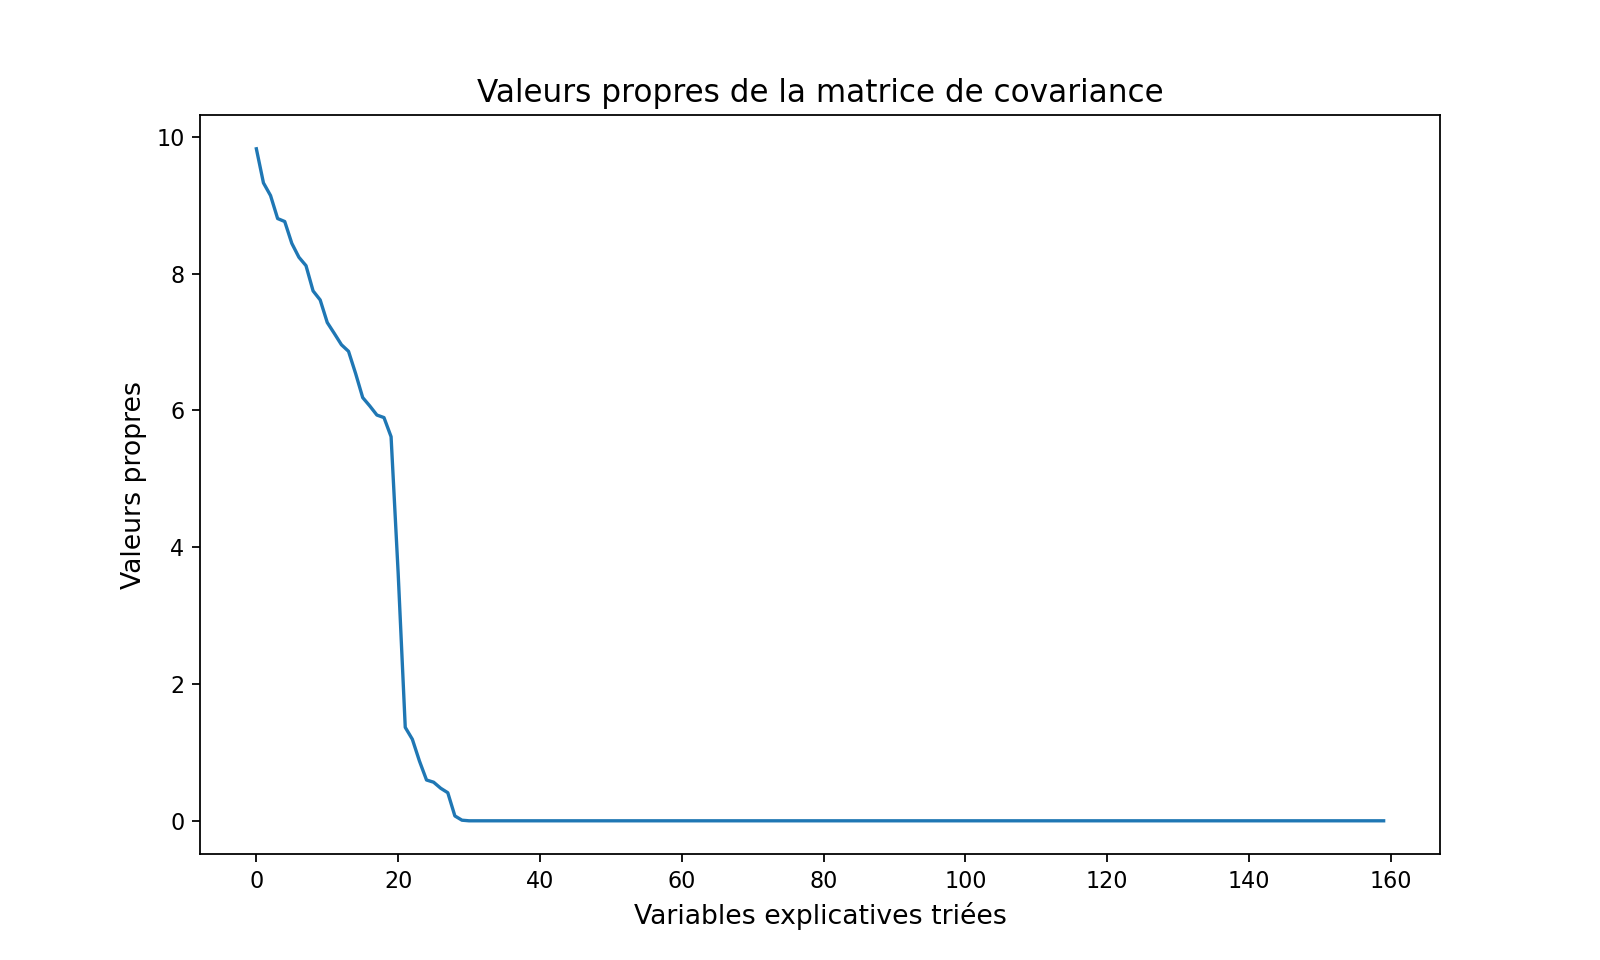

Text(0.5, 1.0, 'Valeurs propres de la matrice de covariance')

In [10]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(valp_train[::-1])

plt.ylabel('Valeurs propres', fontsize=12)
plt.xlabel('Variables explicatives triées', fontsize=12)
plt.title('Valeurs propres de la matrice de covariance', fontsize=14)

On constate qu'il y a une grosse vingtaine de valeurs propres différentes de zéro. 
Les valeurs propres nulles sont ecartées d'emblée, car elles reflètent le fait que les variables explicatives associées ne sont pas du tout significatives dans le modèle. Elles correspondent très probablement à des variables explicatives ajoutées par le robot facétieux.

Nous allons donc garder les valeurs propres non nulles pour discriminer parmi elles les variables explicatives réellement liées à la variable à expliquer dans le modèle.

Dans la suite, nous sélectionnons donc les 20 plus grandes valeurs propres. 

**5. Comparaison des méthodes PCA before OLS et OLS**

**5.1. Méthode PCA before OLS**

In [42]:
from sklearn.decomposition import PCA

# initialisation du modèle
pca = PCA(n_components = 20)

# entraînement
pca2 = pca.fit(X_train)
V1_20 = pca2.components_

# application au modèle OLS
LR = LinearRegression(fit_intercept=True)
Xpca = X_train @ V1_20.T
PCA_OLS = LR.fit(Xpca, Y_train)

Coef_PCA_OLS = PCA_OLS.coef_.squeeze()

<IPython.core.display.Javascript object>


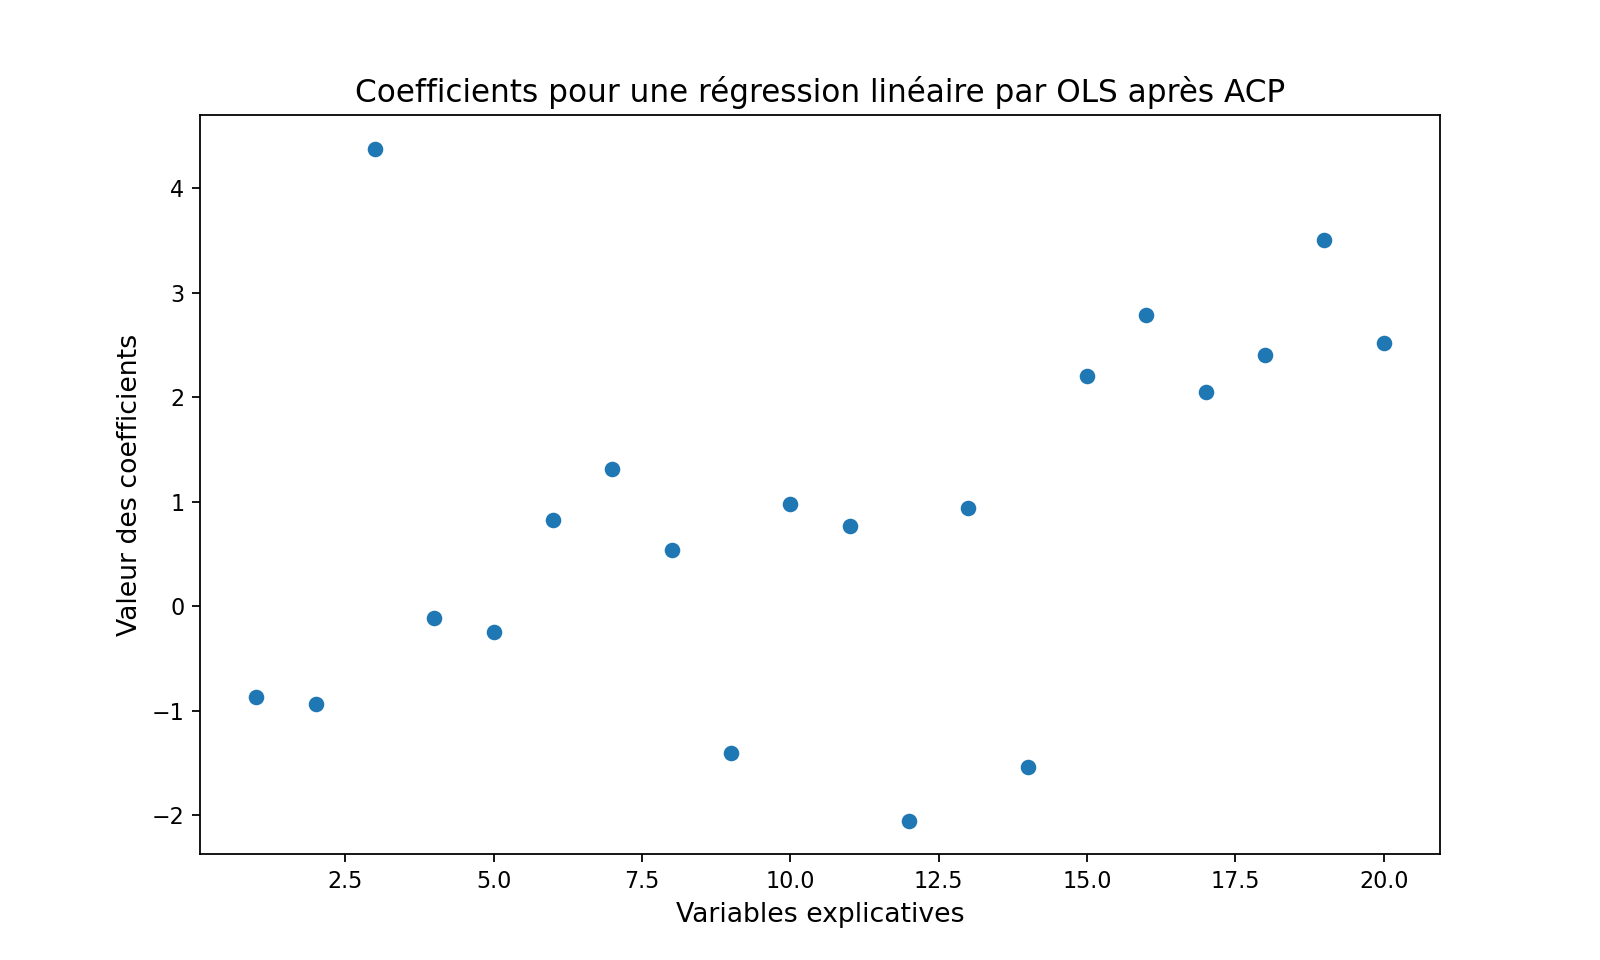

In [12]:
plt.figure(figsize=(10, 6), dpi=80)

# On trace
Xabs = np.linspace(1,20,20)
plt.scatter(Xabs, Coef_PCA_OLS)

# On légende
plt.title("Coefficients pour une régression linéaire par OLS après ACP", fontsize = 14)
plt.xlabel('Variables explicatives', fontsize = 12)
plt.ylabel("Valeur des coefficients", fontsize = 12)
plt.show()

**5.2. Méthode des moindres carrés classique**

In [13]:
LR2 = LinearRegression(fit_intercept=True)
OLS = LR2.fit(X_train, Y_train)

Coef_OLS = OLS.coef_.squeeze()

<IPython.core.display.Javascript object>


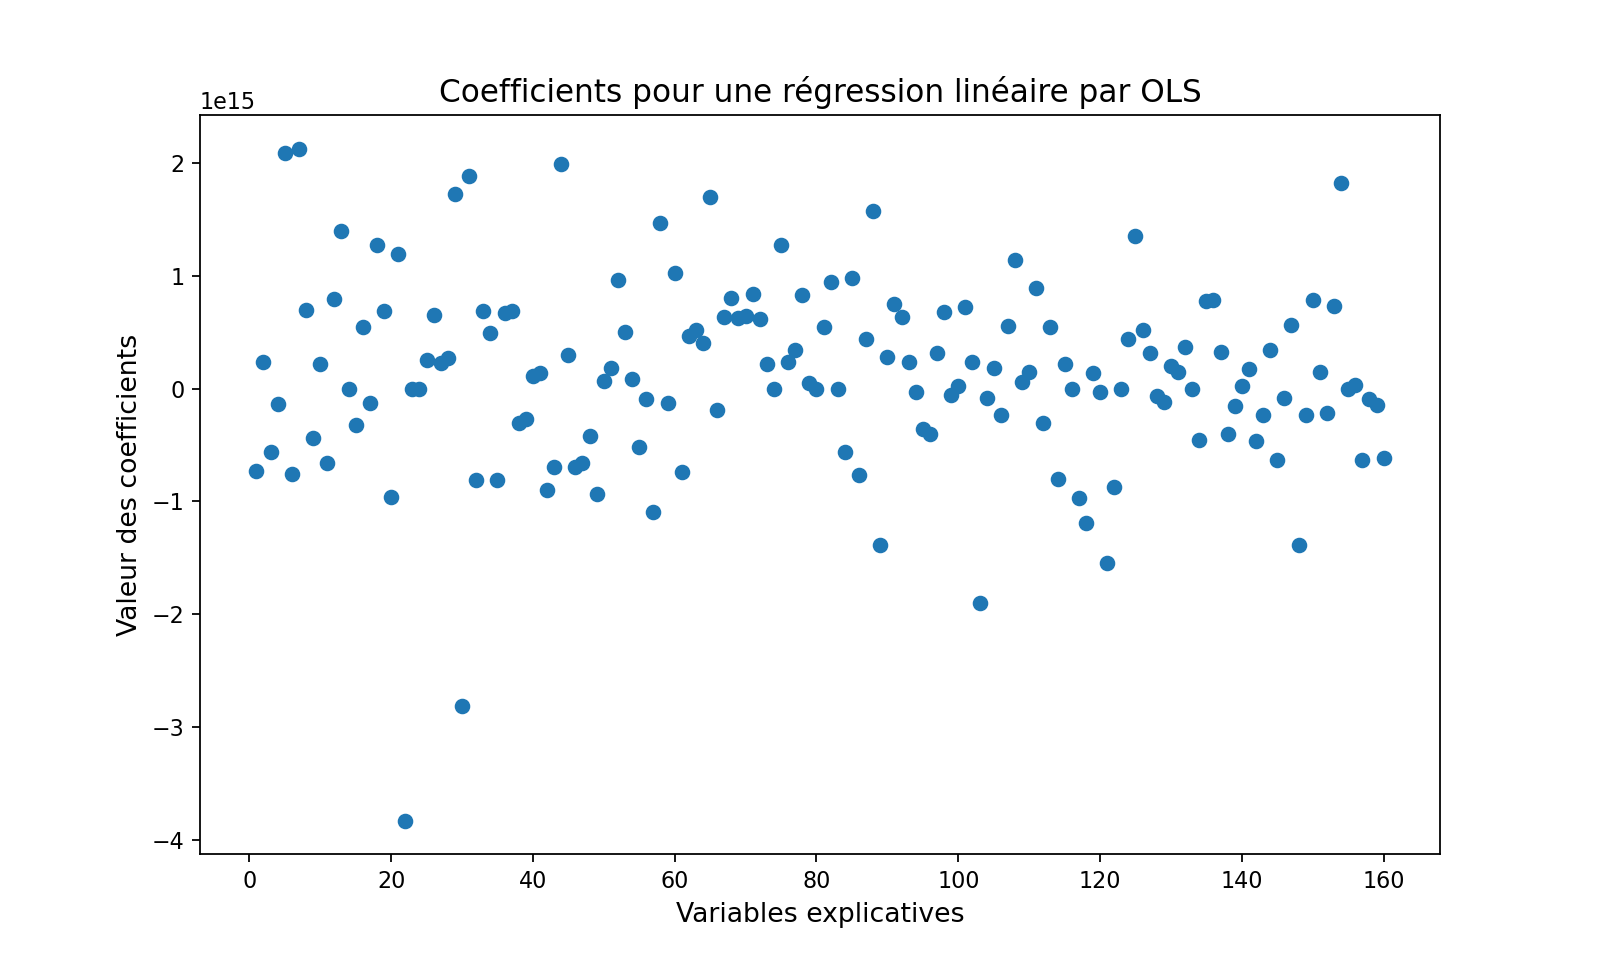

In [14]:
plt.figure(figsize=(10, 6), dpi=80)

# On trace
Xabs = np.linspace(1,160,160)
plt.scatter(Xabs, Coef_OLS)

# On légende
plt.title("Coefficients pour une régression linéaire par OLS", fontsize = 14)
plt.xlabel('Variables explicatives', fontsize=12)
plt.ylabel("Valeur des coefficients", fontsize=12)
plt.show()


**6. Valeurs des intercepts**

In [15]:
# Intercept pour PCA après OLS

I_PCA_OLS = np.asscalar(PCA_OLS.intercept_.squeeze())
print("L'intercept OLS après ACP vaut " + str(round(I_PCA_OLS,3)) )

# Intercept pour OLS
I_OLS = np.asscalar(OLS.intercept_.squeeze())
print("L'intercept OLS vaut " + str(round(I_OLS,3)) )

# Valeur moyenne de Y sur le set d'entraînement
Y_mean = Y_train.mean()
print("La valeur moyenne de Y vaut " + str(round(Y_mean,3)))

L'intercept OLS après ACP vaut 153.44
L'intercept OLS vaut 152.781
La valeur moyenne de Y vaut 153.593


On constate que les intercepts OLS après ACP et OLS ne sont pas égaux. 
En effet, la regression linéaire directe prend en compte beaucoup plus de variables explictives que celle intervenant après l'ACP. Les droites de regression ne s'ajustent donc pas sur les mêmes jeux de données. Elles sont donc différentes, en particulier dans leur intercept qui représente l'ordonnée à l'origine.

In [16]:
# On normalise les données
Xpca_norm = StandardScaler().fit_transform(Xpca)

# Régression sur données normalisées

LRnorm = LinearRegression(fit_intercept=True)
PCA_OLS_norm = LRnorm.fit(Xpca_norm, Y_train)
I_PCA_OLS_norm = np.asscalar(PCA_OLS_norm.intercept_.squeeze())

print("L'intercept OLS après PCA normalisé vaut " + str(round(I_PCA_OLS_norm,3)) )

L'intercept OLS après PCA normalisé vaut 153.593


La normalisation recentre le nuage de points sur l'origine. 
Or, la valeur de l'intercept avant normalisation correspond à "- la valeur moyenne de Y".
Il est donc normal de trouver pour valeur de l'intercept de la regression avec les variables normalisées cette valeur moyenne de Y.

**7. Résidus de prédiction**

**7.1 Tracé et histogramme des résidus pour les deux méthodes**

In [17]:
# Méthode PCA before OLS
Xpca_test = X_test @ V1_20.T
Ypred_PCA_OLS = PCA_OLS.predict(Xpca_test)
Yres_PCA_OLS = Y_test - Ypred_PCA_OLS
Yres_PCA_OLS2 = Yres_PCA_OLS.squeeze()

# Méthode OLS
Ypred_OLS = OLS.predict(X_test)
Yres_OLS = Y_test - Ypred_OLS
Yres_OLS2 = Yres_OLS.squeeze()


<IPython.core.display.Javascript object>


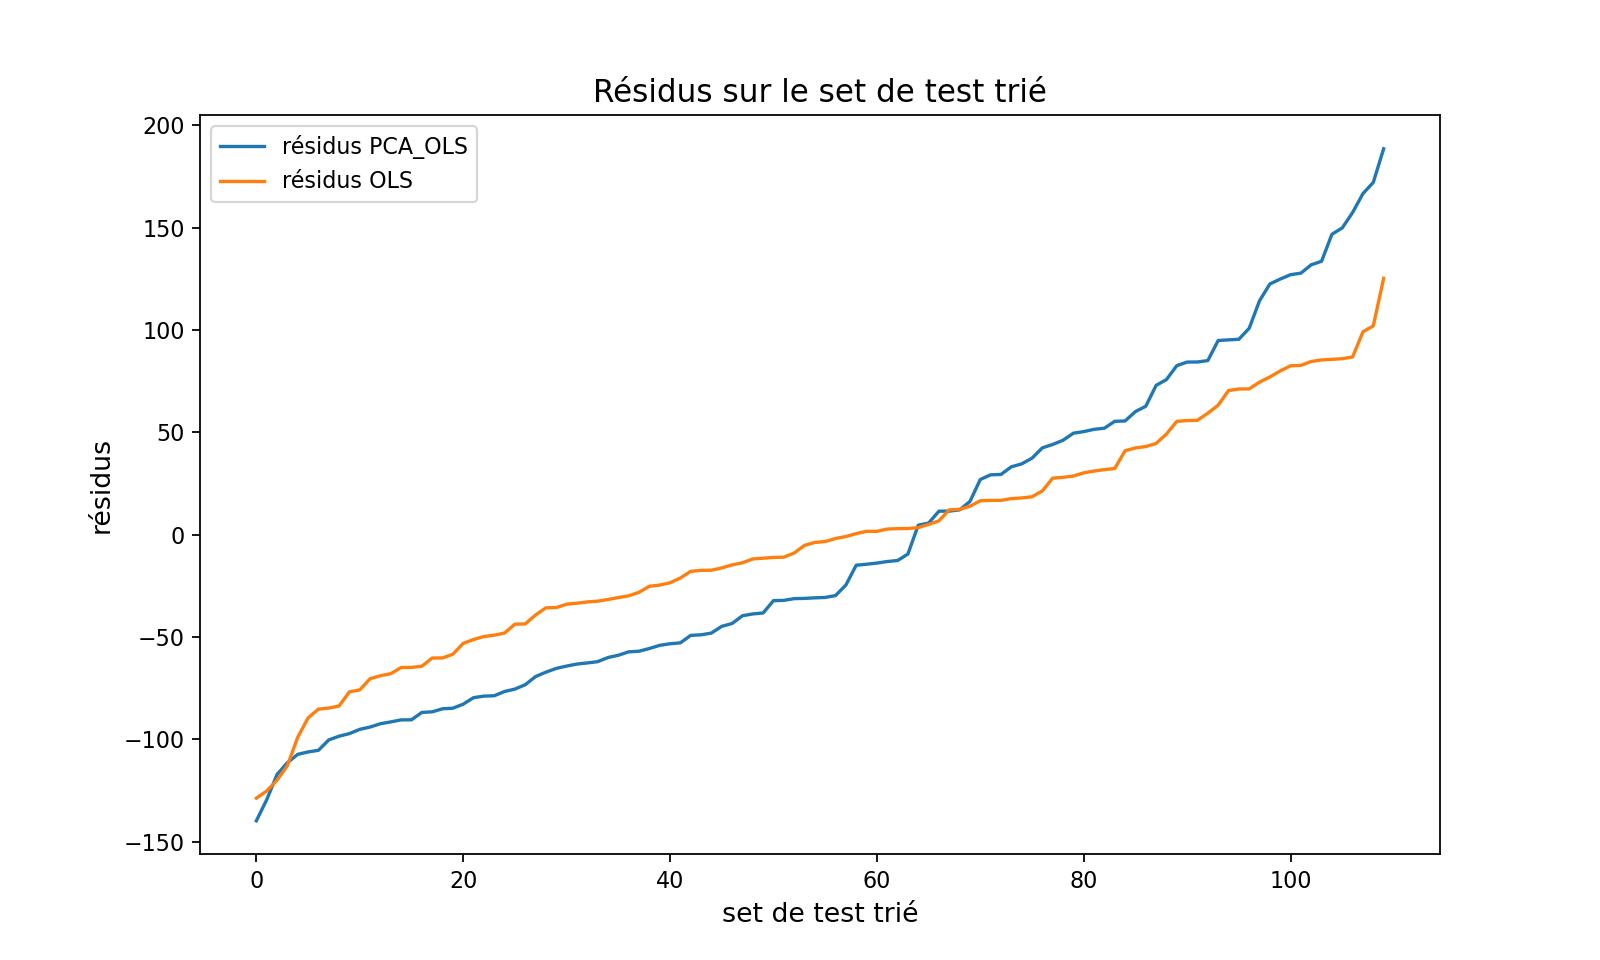

Text(0, 0.5, 'résidus')

In [18]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(np.sort(Yres_PCA_OLS2), label = 'résidus PCA_OLS')
plt.plot(np.sort(Yres_OLS2), label = 'résidus OLS')
plt.legend()
plt.title("Résidus sur le set de test trié", fontsize = 14)
plt.xlabel('set de test trié', fontsize=12)
plt.ylabel("résidus", fontsize=12)

<IPython.core.display.Javascript object>


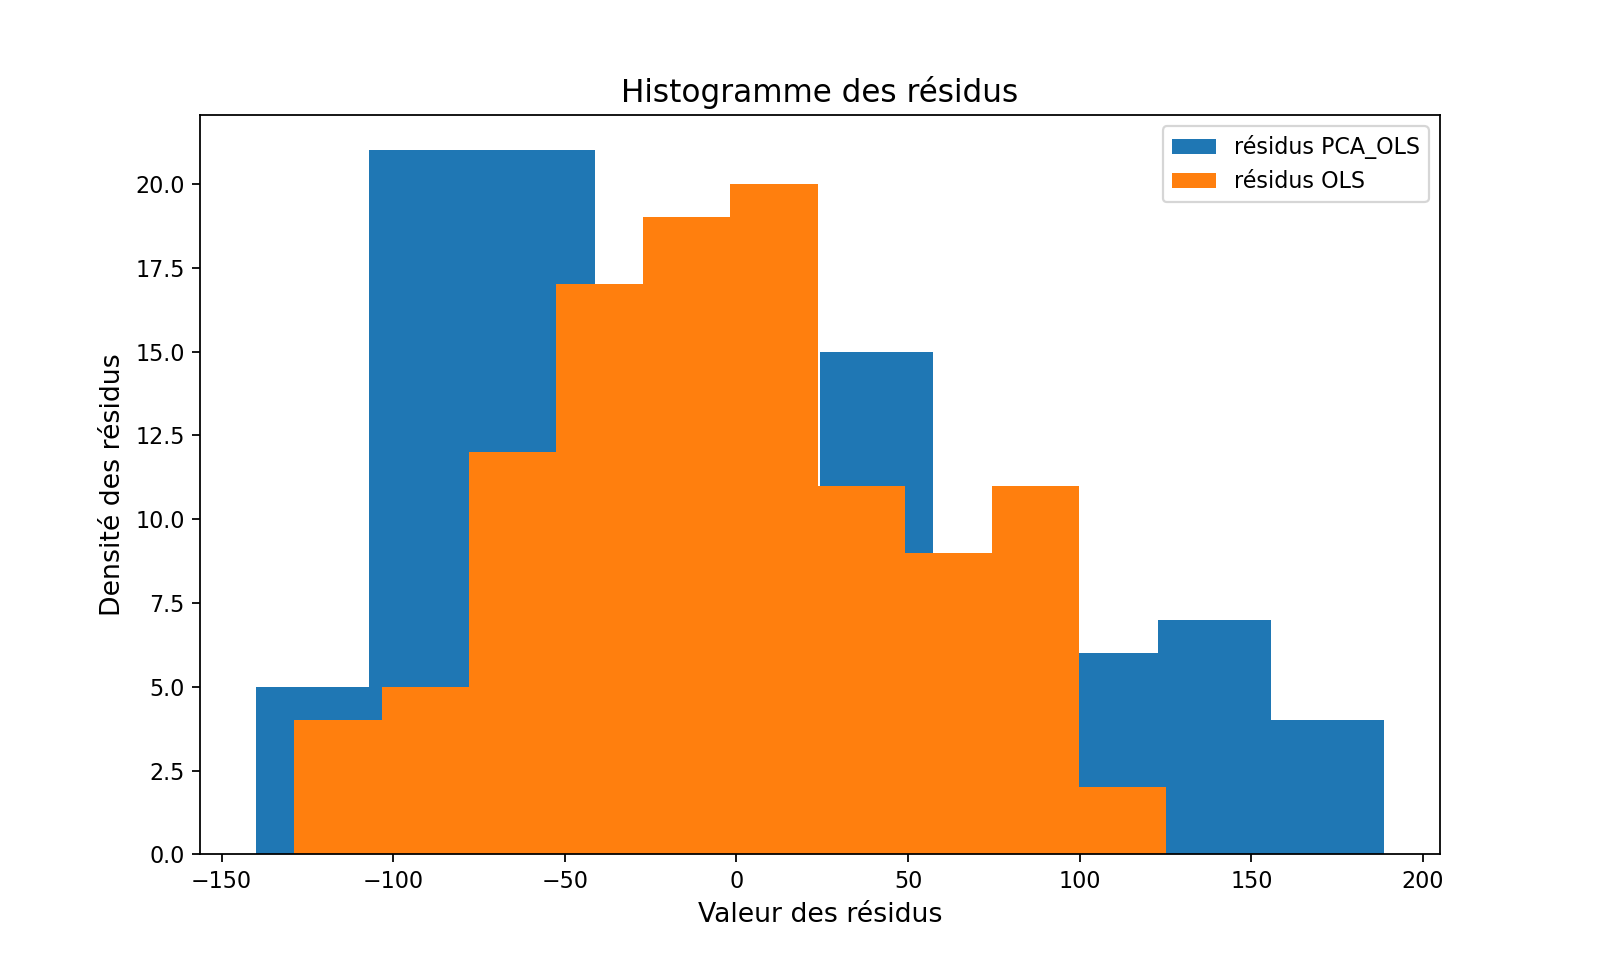

In [19]:
plt.figure(figsize=(10, 6), dpi=80)

plt.hist(Yres_PCA_OLS2, label = 'résidus PCA_OLS')
plt.hist(Yres_OLS2, label = 'résidus OLS')
plt.title("Histogramme des résidus", fontsize=14)
plt.xlabel('Valeur des résidus', fontsize=12)
plt.ylabel("Densité des résidus", fontsize=12)
plt.legend()

**7.2 Coefficient de détermination et risque de prédiction**

In [20]:
# Coefficient de détermination

# Méthode PCA before OLS
deter_PCA_OLS = r2_score(Y_test, Ypred_PCA_OLS)
print("Le coefficient de détermination du modèle OLS après ACP vaut " + str(round(deter_PCA_OLS,3)) )

# Méthode OLS
deter_OLS = r2_score(Y_test, Ypred_OLS)
print("Le coefficient de détermination du modèle OLS vaut " + str(round(deter_OLS,3)) )

Le coefficient de détermination du modèle OLS après ACP vaut -0.03
Le coefficient de détermination du modèle OLS vaut 0.515


In [21]:
# Risque de prédiction

# Méthode PCA before OLS
RP_PCA_OLS = (Yres_PCA_OLS2.T @ Yres_PCA_OLS2) / Yres_PCA_OLS2.shape[0]
print("Le risque de prédiction du modèle OLS après PCA vaut " + str(round(RP_PCA_OLS,3)) )


# Méthode PCA before OLS
RP_OLS = (Yres_OLS2.T @ Yres_OLS2) / Yres_PCA_OLS2.shape[0]
print("Le risque de prédiction du modèle OLS vaut " + str(round(RP_OLS,3)) )

Le risque de prédiction du modèle OLS après PCA vaut 6492.936
Le risque de prédiction du modèle OLS vaut 3054.864


**8. méthode de Forward variable sélection**

In [22]:
# Codage de la t-statistique

def tstat(coeff, residus, Xk):
    sigma2_chapeau = ((np.linalg.norm(residus))**2)/(len(Xk) - 1)
    tstat = coeff / np.sqrt((sigma2_chapeau**(1/2) / np.dot(Xk.T, Xk)))
    return tstat

In [23]:
# Algorithme forward

def forward(X, Y, k):
    var_forward = []
    index_forward = []
    Y_pred = Y
    X_stand = preprocessing.scale(X)
    while(len(var_forward) < k):
        max_tstat = 0
        i = 0
        for X_i in X_stand.T:
            if i in index_forward:
                i += 1
                continue
            Y_pred_stand = preprocessing.scale(Y_pred)
            LRforward = LinearRegression(fit_intercept=False)
            PCAforward = LRforward.fit(X_i.reshape(-1, 1) , Y_pred)
            residus = Y_pred - PCAforward.predict(X_i.reshape(-1, 1))
            t_stat = tstat(abs(PCAforward.coef_[0]), residus, X_i)
            if(t_stat>max_tstat):
                max_tstat = t_stat
                next_forward = X_i
                Y_pred = residus
                index = i
            i += 1
        var_forward.append(next_forward)
        index_forward.append(index)
    var_forward = np.array(var_forward).T
    return var_forward, index_forward

In [24]:
X = dfX.to_numpy()
Y = dfY.to_numpy()
var_forward , index_forward = forward(X, Y, 160)

In [25]:
index_forward

[23,
 122,
 13,
 132,
 26,
 82,
 147,
 79,
 115,
 73,
 96,
 112,
 137,
 120,
 68,
 154,
 71,
 90,
 4,
 148,
 124,
 46,
 141,
 107,
 59,
 81,
 80,
 126,
 14,
 39,
 118,
 84,
 35,
 145,
 101,
 11,
 50,
 105,
 22,
 47,
 61,
 62,
 31,
 104,
 43,
 41,
 92,
 113,
 127,
 5,
 138,
 88,
 53,
 119,
 86,
 130,
 157,
 97,
 27,
 12,
 140,
 69,
 110,
 123,
 83,
 150,
 111,
 121,
 8,
 36,
 149,
 93,
 135,
 133,
 48,
 156,
 109,
 56,
 98,
 64,
 65,
 102,
 99,
 91,
 134,
 116,
 136,
 144,
 106,
 89,
 38,
 95,
 17,
 72,
 87,
 128,
 146,
 29,
 143,
 7,
 45,
 28,
 44,
 158,
 139,
 159,
 52,
 32,
 19,
 25,
 20,
 42,
 152,
 18,
 2,
 114,
 78,
 34,
 75,
 1,
 155,
 63,
 117,
 70,
 153,
 58,
 103,
 3,
 10,
 60,
 100,
 6,
 40,
 16,
 151,
 125,
 33,
 37,
 54,
 51,
 55,
 76,
 66,
 85,
 131,
 108,
 0,
 9,
 129,
 142,
 24,
 57,
 74,
 21,
 15,
 30,
 77,
 67,
 67,
 67]

In [26]:
index_10 = index_forward[:10]
index_10

[23, 122, 13, 132, 26, 82, 147, 79, 115, 73]

In [27]:
reel = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]
k = 0
for i in reel:
    if i in index_10:
        k += 1
print("La méthode forward a réussi à déterminer " + str(k) + " variables")

La méthode forward a réussi à déterminer  8  variables


In [28]:
dfX_forward = dfX_train.loc[ :,['X' + str(i) for i in index_10] ]
dfX_forward

,X23,X122,X13,X132,X26,X82,X147,X79,X115,X73
1,-1.082180,-1.436551,-1.938479,-0.553511,-0.030609,-0.938537,0.368186,-0.402886,1.564414,-0.830301
2,0.934533,0.060207,-0.545154,-0.119218,0.044191,1.065488,0.419077,-0.718897,-0.680245,-0.054499
3,-0.243771,0.477072,-0.196823,-0.770658,-0.890508,-0.938537,-1.190459,0.525397,-0.757647,0.721302
4,-0.764944,-0.672582,-0.980568,0.459840,-0.155070,-0.938537,-2.214410,0.327890,0.171178,-0.054499
5,-0.855583,-0.865768,-2.025562,-0.408747,1.002953,-0.938537,-1.388962,-1.666931,0.867796,-1.606102
...,...,...,...,...,...,...,...,...,...,...
434,0.028145,-0.954921,0.674005,0.170311,0.084389,-0.938537,-0.374997,0.229137,0.635590,-0.830301
436,-1.558034,-1.286164,-0.980568,-1.060187,2.622558,-0.938537,0.234393,-0.988824,1.951424,-1.606102
437,0.413360,0.655795,0.151508,1.256044,0.883177,1.065488,0.386174,-0.053957,-0.602843,-0.054499
438,-0.334410,-0.380915,0.935254,-1.422098,-0.337843,1.065488,1.196514,1.664355,-0.602843,0.721302


**9. OLS sur les variables sélectionnées et risque**

In [29]:
X_forward = np.array(dfX_forward)
X_forward

array([[-1.08218016, -1.43655059, -1.93847913, ..., -0.40288615,
         1.56441355, -0.83030083],
       [ 0.93453324,  0.06020733, -0.54515416, ..., -0.71889748,
        -0.68024452, -0.05449919],
       [-0.24377122,  0.47707245, -0.19682291, ...,  0.52539714,
        -0.75764652,  0.72130245],
       ...,
       [ 0.41336012,  0.65579507,  0.15150833, ..., -0.05395697,
        -0.60284252, -0.05449919],
       [-0.33441002, -0.38091476,  0.93525363, ...,  1.66435464,
        -0.60284252,  0.72130245],
       [-1.53537419, -0.08871747,  0.06442552, ...,  0.58464926,
         3.65426761, -0.83030083]])

In [30]:
# OLS
LRforward = LinearRegression(fit_intercept=True)
forward_OLS = LRforward.fit(X_forward, Y_train)

Y_forward = forward_OLS.predict(X_forward)
Y_res_forward = Y_train - Y_forward
Y_res_forward = Y_res_forward.squeeze()
 
# Risque de prédiction
RP_forward = (Y_res_forward.T @ Y_res_forward) / Y_res_forward.shape[0]
print("Le risque de prédiction du modèle forward_OLS vaut " + str(round(RP_forward,3)) )

Le risque de prédiction du modèle forward_OLS vaut 2953.134


Le risque de prédiction dans le cas du forward_OLS est plus faible que dans les autres scénarios. 

**10. Séparation de set d'entraînement en 5 parties**

In [31]:
# définition aléatoire de l'index de train
random.shuffle(i_train)
kfold = 5
train_fold=[]
for k in range(0, len(i_train)//(len(i_train)//kfold) ):
        ifold=[]   
        for i in range (k* (len(i_train)//kfold), (k+1)*(len(i_train)//kfold)):
             ifold.append(i_train[i])
        train_fold.append(ifold)
t = len(i_train) % (len(i_train)//kfold) 
train_fold[-1] += i_train[:t]


# définition aléatoire de l'index de test
i_test = [ i for i in range (442) if i not in i_train ]
random.shuffle(i_test)
kfold = 5
test_fold=[]
for k in range(0, len(i_test)//(len(i_test)//kfold) ):
        ifold=[]   
        for i in range (k* (len(i_test)//kfold), (k+1)*(len(i_test)//kfold)):
             ifold.append(i_test[i])
        test_fold.append(ifold)
        

print(train_fold)
[len(v) for v in train_fold]

[[281, 151, 55, 4, 270, 384, 126, 71, 66, 220, 394, 235, 69, 405, 263, 211, 52, 305, 85, 213, 411, 49, 198, 141, 42, 402, 230, 432, 388, 96, 177, 266, 214, 364, 227, 161, 40, 383, 425, 258, 133, 361, 101, 25, 226, 82, 395, 127, 355, 297, 271, 286, 310, 80, 423, 218, 374, 252, 436, 239, 344, 208, 197, 200, 191, 192], [392, 376, 44, 1, 438, 155, 315, 342, 60, 94, 348, 382, 33, 99, 188, 233, 346, 63, 268, 92, 23, 142, 201, 17, 430, 110, 304, 132, 179, 206, 140, 415, 386, 389, 16, 302, 112, 184, 295, 269, 5, 416, 371, 413, 186, 333, 202, 203, 95, 260, 116, 422, 291, 247, 264, 10, 397, 318, 196, 238, 303, 417, 154, 334, 18, 234], [262, 229, 160, 64, 231, 20, 120, 195, 236, 87, 245, 26, 7, 169, 134, 285, 30, 319, 103, 267, 38, 340, 53, 316, 324, 204, 56, 13, 320, 412, 370, 117, 148, 309, 47, 251, 279, 217, 326, 180, 15, 37, 356, 308, 190, 391, 22, 189, 124, 398, 248, 67, 9, 317, 173, 441, 257, 123, 73, 86, 3, 31, 61, 221, 280, 322], [14, 108, 354, 283, 36, 437, 215, 404, 156, 93, 341, 78, 58

[66, 66, 66, 66, 68]

In [32]:
dfX_train_fold = [dfX.iloc[i] for i in train_fold]
dfY_train_fold = [dfY.iloc[i] for i in train_fold]
dfX_test_fold = [dfX.iloc[i] for i in test_fold]
dfY_test_fold = [dfY.iloc[i] for i in test_fold]

X_train_fold = [np.array(dfX_train_fold)[i] for i in range(5)]
Y_train_fold = [np.array(dfY_train_fold)[i] for i in range(5)]
X_test_fold = [np.array(dfX_test_fold)[i] for i in range(5)]
Y_test_fold = [np.array(dfY_test_fold)[i] for i in range(5)]


**11. Régression Ridge et risque optimal**

In [34]:
def risque_fold(l):
    i = 0
    R = 0
    for i in range(5) :
        R_fold = Ridge(l)
        fold_ridge = R_fold.fit(X_train_fold[i], Y_train_fold[i])
        Y_predict = fold_ridge.predict(X_test_fold[i])
        Y_res = Y_test_fold[i].squeeze() - Y_predict.squeeze() 
        Y_res = Y_res.squeeze()
        R += (Y_res.T @ Y_res) / Y_res.shape[0]
        i += 1
    R /= len(X_train_fold)
    return R


<IPython.core.display.Javascript object>


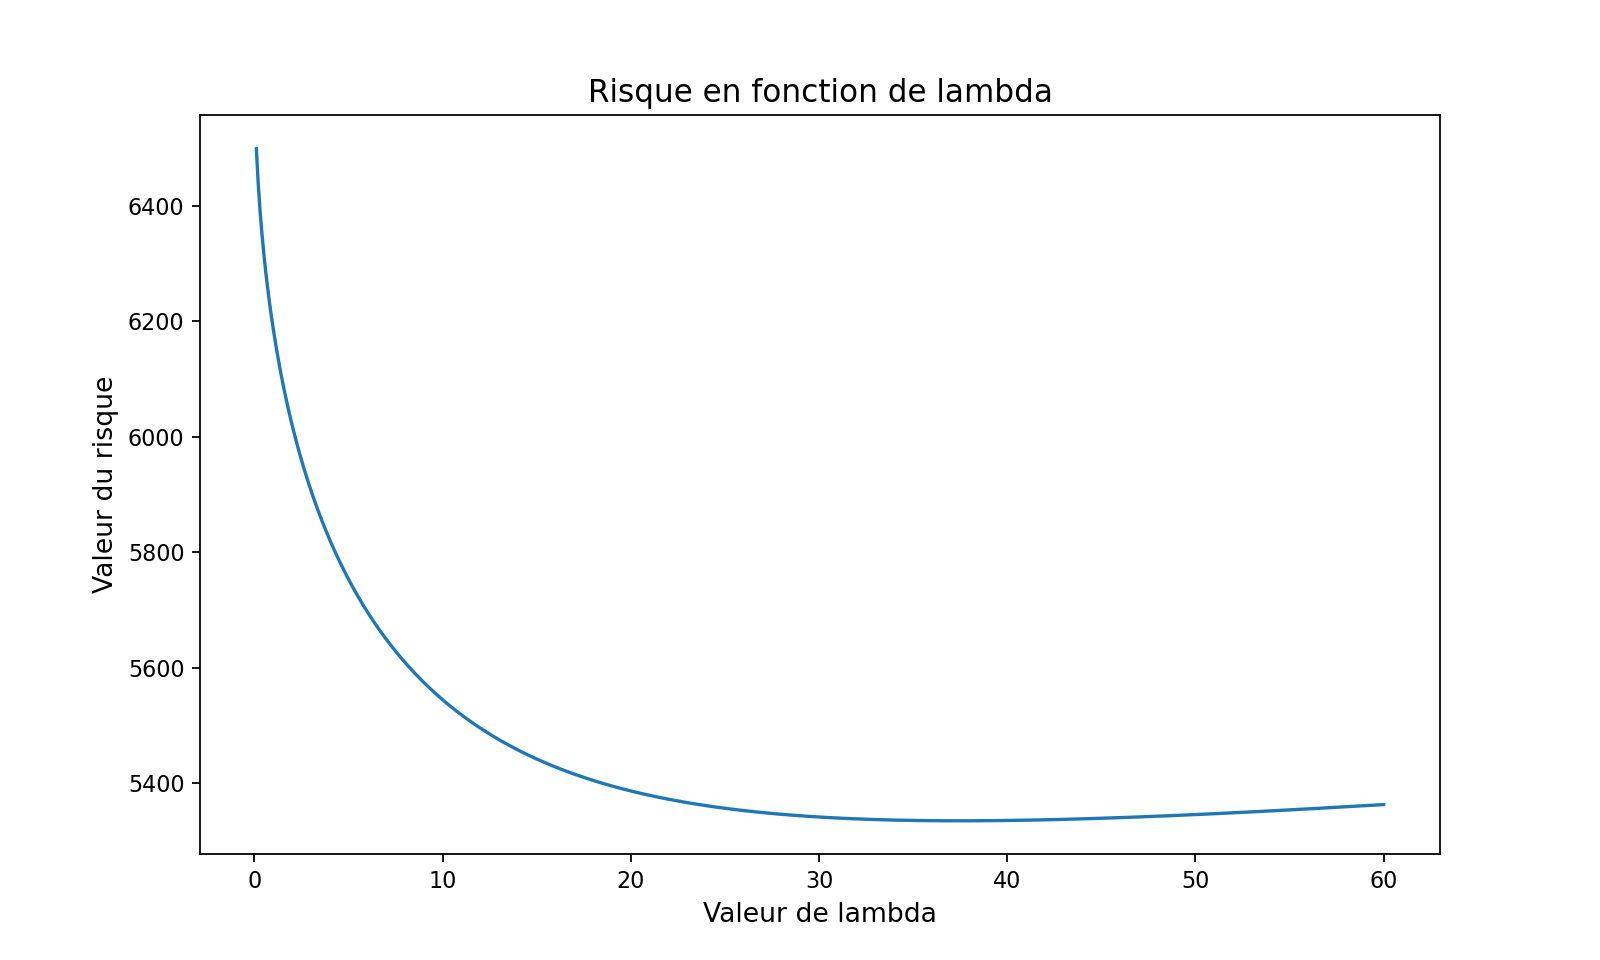

In [35]:
# tracé du risque en fonction de lambda
plt.figure(figsize=(10, 6), dpi=80)
lambda_abs = [x/10 for x in range(1, 601)]
risque = []
for lamb in lambda_abs:
    risque.append(risque_fold(lamb))

plt.plot(lambda_abs, risque)
plt.title("Risque en fonction de lambda", fontsize=14)
plt.xlabel('Valeur de lambda', fontsize=12)
plt.ylabel("Valeur du risque", fontsize=12)
plt.show()

In [36]:
index_min = np.argmin(risque, axis = 0)
lambda_ridge = lambda_abs[index_min]
risque_fold(lambda_ridge)

print('le lambda optimal vaut ' + str(lambda_ridge))
print('la valeur minimale du risque est ' + str(round(risque_fold(lambda_ridge),3)))

le lambda optimal vaut 37.5
la valeur minimale du risque est 5334.717


**12. Régularisation LASSO et risque associé**

In [37]:
# Détermination du paramètre de régularisation optimal
Lasso = LassoCV(alphas = lambda_abs, cv = 5)
Reg_Lasso = Lasso.fit(X, Y)

alpha_Lasso = Reg_Lasso.alpha_
print('Le paramètre de régularisation optimal est '+ str(alpha_Lasso))

Le paramètre de régularisation optimal est 1.6


In [38]:
# Calcul du risque de prédiction par Lasso sur le set de test 
Yres_test_Lasso = Y_test.squeeze() - Reg_Lasso.predict(X_test.squeeze())
Yres_test_Lasso = Yres_test_Lasso.squeeze()

R_Lasso = (Yres_test_Lasso.T @ Yres_test_Lasso) / Yres_test_Lasso.shape[0]
print("Le risque de prédiction par Lasso vaut " + str(round(R_Lasso,3)) )

Le risque de prédiction par Lasso vaut 2465.184


On constate que le risque de prédiction par Lasso est très inférieur à celui du Ridge. 

**13. Variables sélectionnées par Lasso et méthode OLS**

In [44]:
# Variables Lasso
Coeff_Lasso = np.abs(Reg_Lasso.coef_)

dico_Lasso = {}
k = 0
for c in Coeff_Lasso : 
    if(c != 0):
        dico_Lasso[k]= c
    k += 1
dico_Lasso = sorted(dico_Lasso.items(), key=lambda t: -t[1])
variables_Lasso = [i[0] for i in dico_Lasso]

print('La sélection Lasso est {} '.format(variables_Lasso)) 
print('Il y a {} variables sélectionnées par Lasso.'.format(len(variables_Lasso)))

La sélection Lasso est [23, 122, 132, 115, 82, 154, 13, 142, 129, 98, 44, 136, 124, 39, 157, 96, 71, 87, 147, 42, 63, 140, 94, 50, 83, 156] 
Il y a 26 variables sélectionnées par Lasso.


In [46]:
#Regression OLS
X_train_Lasso = []
X_test_Lasso = []

for index, coeff in dico_Lasso:
    X_train_Lasso.append((X_train.T)[index])
    X_test_Lasso.append((X_test.T)[index])

X_train_Lasso = np.array(X_train_Lasso).T
X_test_Lasso = np.array(X_test_Lasso).T

Lasso_OLS = LinearRegression(fit_intercept=True)
Reg_Lasso_OLS = Lasso_OLS.fit(X_train_Lasso , Y_train)

Y_pred_Lasso = Lasso_OLS.predict(X_test_Lasso)
Y_res_Lasso = Y_test - Y_pred_Lasso
Y_res_Lasso = Y_res_Lasso.squeeze()
R_Lasso_OLS = (Y_res_Lasso.T @ Y_res_Lasso) / Y_res_Lasso.shape[0]

print("Le risque de prédiction par Lasso_OLS vaut " + str(round(R_Lasso_OLS,3)) )

Le risque de prédiction par Lasso_OLS vaut 2830.807


Le risque est moins bon pour un Lasso_OLS que pour un Lasso simple.

**14. Performance Lasso**

In [47]:
k = 0
for i in reel:
    if i in variables_Lasso:
        k += 1
print("La méthode Lasso a réussi à déterminer " + str(k) + " variables")

La méthode Lasso a réussi à déterminer  7  variables


On constate que la méthode forward retrouve plus de variables malgré un risque de prédiction plus élevé. 